<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png" width=200 />


## Lab: Practical Application of Transpose Convolution  

**Estimated time needed: 30 minutes**

This lab will guide you through creating, training, and evaluating models that use transpose convolution layers for tasks such as image reconstruction. 

##### Learning objectives: 

By the end of this lab, you will: 

- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model 

- Visualize the results  

##### Prerequisites: 

- Basic understanding of Python programming 

- Familiarity with convolutional neural network (CNN) concepts 

- Keras and TensorFlow installed 




#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
import warnings
warnings.simplefilter('ignore')

#!pip install tensorflow==2.16.2 

#!pip install matplotlib 
import tensorflow as tf 

from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D 

import numpy as np 

import matplotlib.pyplot as plt 

2025-01-01 18:45:34.602156: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Explanation:**

 `tensorflow` is the main library for machine learning in Python. 

  `Model, Input, Conv2D, and Conv2DTranspose` are used to create and manipulate the layers in your model. 

  `numpy` and `matplotlib` are used for data manipulation and visualization. 

 
**Step 2: Define the Input Layer**

You need to define the input shape for your model. For simplicity, let's assume you are working with an input image of size 28x28 with 1 channel (grayscale). 

 


In [2]:
input_layer = Input(shape=(28, 28, 1))

**Explanation:**

`Input(shape=(28, 28, 1))` creates an input layer that expects 28x28 grayscale images.


**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image. 


In [3]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 


**Explanation:**

`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')` creates a convolution layer with 32 filters. 

`Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')` creates a transpose convolution layer for reconstructing the image. 

**Step 4: Create the Model**

Now, you will create the model by specifying the input and output layers.


In [4]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Explanation:**

`Model(inputs=input_layer, outputs=transpose_conv_layer)` creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.  

**Step 5: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

**Explanation:**

- optimizer=`adam` specifies the Adam optimizer. 

- loss=`binary_crossentropy` specifies the binary cross-entropy loss function, suitable for binary pixel classification. 

- metrics=[`accuracy`] directs Keras to evaluate the model using accuracy during training. 


**Step 6: Train the Model**

You can now train the model on some training data. For this example, let's assume X_train is our training input data.


In [6]:
# Generate synthetic training data 

X_train = np.random.rand(1000, 28, 28, 1) 

y_train = X_train # For reconstruction, the target is the input 

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0752 - val_accuracy: 0.0000e+00 - val_loss: 0.0566
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0507 - val_accuracy: 0.0000e+00 - val_loss: 0.0351
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0307 - val_accuracy: 0.0000e+00 - val_loss: 0.0194
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0168 - val_accuracy: 0.0000e+00 - val_loss: 0.0112
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0101 - val_accuracy: 0.0000e+00 - val_loss: 0.0072
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0051
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0048 - val_accuracy: 0.0000e+00 - val_loss: 0.0040
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

**Explanation:**

- X_train is a placeholder for your actual training data. 

- y_train is the same as X_train for image reconstruction. 

- model.fit trains the model for a specified number of epochs and batch size.

  
**Step 7: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs. 


In [7]:
 # Generate synthetic test data 

X_test = np.random.rand(200, 28, 28, 1) 

y_test = X_test 


loss, accuracy = model.evaluate(X_test, y_test) 

print(f'Test loss: {loss}') 

print(f'Test accuracy: {accuracy}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0022 
Test loss: 0.0022346803452819586
Test accuracy: 0.0


**Explanation:**

`X_test` and `y_test` are placeholders for your actual test data. 

`model.evaluate` computes the loss and accuracy of the model on test data. . 

**Step 8: Visualize the Results**

To better understand the model's performance, let's visualize some reconstructed images.  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


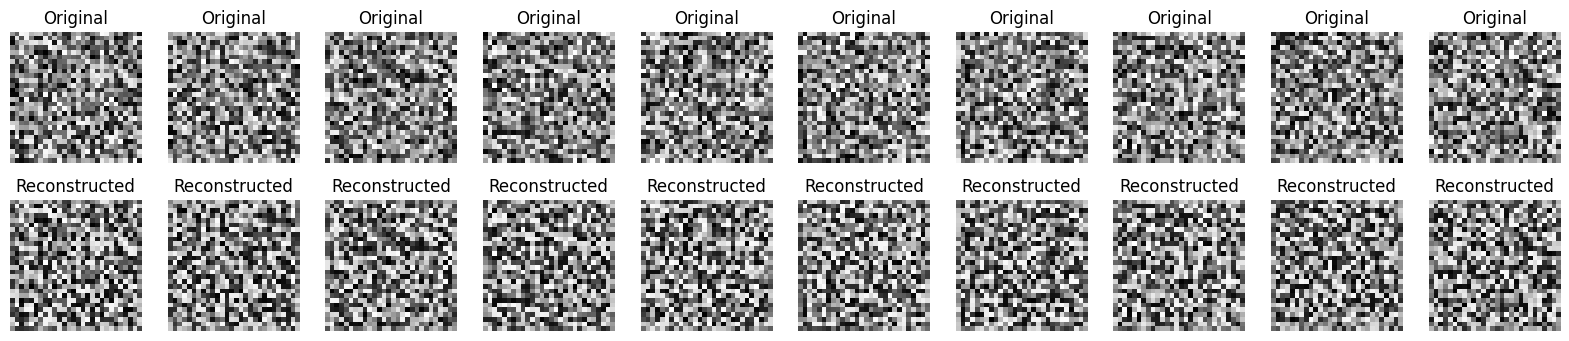

In [8]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

**Explanation:**

`model.predict` generates predictions for the test data. 

`plt.imshow` visualizes the original and reconstructed images side by side for comparison. 


### Practice exercises


#### Exercise 1: Experiment with Different Kernel Sizes 

**Objective:** Understand the impact of different kernel sizes on the model's performance. 

**Instructions:**
1. Modify the kernel size of the `Conv2D` and `Conv2DTranspose` layers. 
2. Recompile, train, and evaluate the model. 
3. Observe and record the differences in performance.


In [9]:
# different dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255.0
y_train = x_train.copy()
x_test = x_test.astype('float32')/255.0
y_test = x_test.copy()

In [10]:
# Write your code here
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization

input_layer = Input(shape=(32, 32, 3))
conv_layer = Conv2D(filters=16, kernel_size=(5, 5),
                    activation='relu', padding='same')(input_layer)

norm_layer = BatchNormalization()(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=3, kernel_size=(5, 5),
                    activation='sigmoid', padding='same')(norm_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.name = 'convolutional_autoencoder'
model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, acc = model.evaluate(x_test, y_test)
print(f"test loss: {loss:e}, test accuracy: {acc:.3f}")

Model: "convolutional_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 3)      │         1,203 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,483 (9.70 KB)

 Trainable params: 2,451 (9.57 KB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6906 - loss: 0.0101 - val_accuracy: 0.6674 - val_loss: 0.0022
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8242 - loss: 0.0014 - val_accuracy: 0.8216 - val_loss: 0.0014
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8382 - loss: 0.0013 - val_accuracy: 0.8407 - val_loss: 7.0207e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8474 - loss: 0.0013 - val_accuracy: 0.7562 - val_loss: 9.6364e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8556 - loss: 0.0012 - val_accuracy: 0.8759 - val_loss: 7.2949e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8542 - loss: 0.0011 - val_accuracy: 0.8942 - val_loss: 6.5587e-04
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8571 - loss: 0.0011 - val_accuracy: 0.7898 - val_loss: 7.3473e-04
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step 

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')



#### Exercise 2: Add Dropout Layers

**Objective:** Add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after the convolutional layer. 
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [11]:
# Write your code here
from tensorflow.keras.layers import Dropout

input_layer = Input(shape=(32, 32, 3))
conv_layer = Conv2D(filters=16, kernel_size=(3, 3),
                    activation='relu', padding='same')(input_layer)
drop_layer = Dropout(rate=0.2)(conv_layer)
norm_layer = BatchNormalization()(drop_layer)
transpose_conv_layer = Conv2DTranspose(filters=3, kernel_size=(3, 3),
                    activation='relu', padding='same')(norm_layer)
model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.name = 'convolutional_autoencoder_dropout'
model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, acc = model.evaluate(x_test, y_test)
print(f"test loss: {loss:e}, test accuracy: {acc:.3f}")

Model: "convolutional_autoencoder_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947 (3.70 KB)

 Trainable params: 915 (3.57 KB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4699 - loss: 0.0796 - val_accuracy: 0.5842 - val_loss: 0.0044
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6179 - loss: 0.0066 - val_accuracy: 0.7043 - val_loss: 0.0027
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6663 - loss: 0.0049 - val_accuracy: 0.7921 - val_loss: 0.0011
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7343 - loss: 0.0039 - val_accuracy: 0.8316 - val_loss: 0.0013
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7387 - loss: 0.0039 - val_accuracy: 0.7744 - val_loss: 0.0016
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7425 - loss: 0.0038 - val_accuracy: 0.7919 - val_loss: 8.4992e-04
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7579 - loss: 0.0033 - val_accuracy: 0.8494 - val_loss: 9.4987e-04
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7660 -

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')



#### Exercise 3: Use Different Activation Functions 

**Objective:** Experiment with different activation functions and observe their impact on model performance. 

**Instructions:**
1. Change the activation function of the convolutional and transpose convolutional layers to `tanh`. 
2. Recompile, train, and evaluate the model.


In [12]:
# Write your code here
from tensorflow.keras.layers import Dropout

input_layer = Input(shape=(32, 32, 3))
conv_layer = Conv2D(filters=16, kernel_size=(3, 3),
                    activation='tanh', padding='same')(input_layer)
drop_layer = Dropout(rate=0.2)(conv_layer)
norm_layer = BatchNormalization()(drop_layer)
transpose_conv_layer = Conv2DTranspose(filters=3, kernel_size=(3, 3),
                    activation='tanh', padding='same')(norm_layer)
model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
model.name = 'convolutional_autoencoder_dropout_tanh'
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, acc = model.evaluate(x_test, y_test)
print(f"test loss: {loss:e}, test accuracy: {acc:.3f}")

Model: "convolutional_autoencoder_dropout_tanh"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 3)      │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947 (3.70 KB)

 Trainable params: 915 (3.57 KB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/10


ValueError: Input 0 of layer "convolutional_autoencoder_dropout_tanh" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 28, 28)

In [ ]:
# Predict on test data 
y_pred = model.predict(x_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(32, 32, 3))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

<details>
<summary>Click here for solution</summary> </br>

```python

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


### Conclusion:

By completing this lab, you have successfully created, trained, and evaluated a simple neural network model using transpose convolution for image reconstruction. This exercise provided hands-on experience with Keras and practical applications of transpose convolution layers. Continue experimenting with different architectures and datasets to deepen your understanding and skills in deep learning with Keras. 


Copyright © IBM Corporation. All rights reserved.
